<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  📌  Trực Quan Hóa Dữ Liệu - 21_21 📌
  
   Lab 1
</div>

# 1. Thu thập dữ liệu

# 2. Khám phá dữ liệu và tiền xử lí dữ liệu

## 2.1 Load data and take a quick look

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import RobustScaler


### 2.1.1 Đọc dữ liệu

In [2]:
# Đọc tệp CSV vào DataFrame
chunk_size = 100000  # Điều chỉnh phù hợp với bộ nhớ của hệ thống
chunks = pd.read_csv(r"data/US_Accidents_Reduced.csv", chunksize=chunk_size)

# List để lưu từng chunk
chunk_list = []

# Lặp qua từng chunk và thêm vào list
for chunk in chunks:
    chunk_list.append(chunk)

# Gộp tất cả các chunk thành một DataFrame
df = pd.concat(chunk_list, ignore_index=True)

# # Randomly sample 1/10th of the rows
# sampled_df = df.sample(frac=0.1, replace=False, random_state=42)  # Sử dụng một random state cố định để có kết quả tái lặp được

# # Lưu DataFrame đã chọn vào một tệp CSV mới
# sampled_df.to_csv("Data/US_Accidents_Reduced.csv", index=False)

# df = sampled_df.copy()


### 2.1.2 Kích thước dữ liệu

In [3]:
df.shape

(772839, 46)

### 2.1.3 Giải thích ý nghĩa các cột

In [4]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-7182628,Source1,1,2020-04-17 09:29:30,2020-04-17 10:29:30,26.706900,-80.119360,26.706900,-80.119360,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-5404588,Source1,2,2022-04-21 10:01:00.000000000,2022-04-21 11:44:08.000000000,38.781024,-121.265820,38.780377,-121.265815,0.045,...,False,False,True,False,False,False,Day,Day,Day,Day
2,A-156000,Source3,3,2016-08-12 16:45:00,2016-08-12 17:15:00,33.985249,-84.269348,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-1871277,Source2,3,2019-09-20 15:22:16,2019-09-20 15:56:00,47.118706,-122.556908,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2031222,Source2,2,2019-06-03 16:55:43,2019-06-03 18:12:09,33.451355,-111.890343,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


- **ID**: ID của vụ tai nạn
- **Source**: Nguồn dữ liệu thô 
- **Severity**: Mức độ nghiêm trọng của vụ tai nạn, có giá trị từ 1 -> 4, biểu thị mức độ ảnh hưởng tăng dần lên hoạt động giao thông
- **Start_Time**: Thời gian bắt đầu vụ tai nạn theo giờ địa phương
- **End_Time**: Thời gian kết thúc vụ tai nạn, chỉ thời gian ảnh hưởng đến giao thông chấm dứt theo giờ địa phương
- **Start_Lat**: Vĩ độ của địa điểm xảy ra tai nạn
- **Start_Lng**: Kinh độ của địa điểm xảy ra tai nạn
- **End_Lat**: Vĩ độ của địa điểm kết thúc
- **End_Lng**: Kinh độ của địa điểm kết thúc
- **Distance(mi)**: Chiều dài đoạn đường bị ảnh hưởng bởi vụ tai nạn, tính bằng Miles
- **Description**: Mô tả về vụ tai nạn
- **Street**: Tên đường trong trường địa chỉ
- **City**: Tên thành phố trong trường địa chỉ
- **County**: Tên quận trong trường địa chỉ
- **State**: Tên bang trong trường địa chỉ
- **Zipcode**: Mã bưu chính trong trường địa chỉ
- **Country**: Tên quốc gia trong trường địa chỉ
- **Timezone**: Múi giờ dựa trên vị trí xảy ra tai nạn (miền đông, miền trung,...)
- **Airport_Code**: Trạm thời tiết dựa trên sân bay, gần nhất với vị trí của vụ tai nạn
- **Weather_Timestamp**: Thời gian ghi nhận thông tin thời tiết (theo giờ địa phương)
- **Temperature(F)**: Hiển thị nhiệt độ (tính bằng Fahrenheit)
- **Wind_Chill(F)**: Hiển thị mức độ lạnh của không khí (tính bằng Fahrenheit)
- **Humidity(%)**: Hiển thị độ ẩm (tính bằng %)
- **Pressure(in)**: Hiển thị áp suất không khí (tính bằng inches)
- **Visibility(mi)**: Hiển thị tầm nhìn (tính bằng miles)
- **Wind_Direction**: Hiển thị hướng gió
- **Wind_Speed(mph)**: Hiển thị tốc độ gió (tính bằng miles / giờ)
- **Precipitation(in)**: Hiển thị lượng mưa tính theo inches (nếu có)
- **Weather_Condition**: Hiển thị tình trạng thời tiết (mưa, có tuyết, có sấm sét,...)
- **Amenity**: Chú thích địa điểm cho biết sự hiện diện của tiện nghi ở vị trí lân cận
- **Bump**: Chú thích địa điểm cho biết sự hiện diện của gờ giảm tốc ở vị trí lân cận
- **Crossing**: Chú thích địa điểm cho biết sự hiện diện của điểm băng qua ở vị trí lân cận
- **Give_Way**: Chú thích địa điểm cho biết sự hiện diện của đoạn nhường đường ở vị trí lân cận
- **Junction**: Chú thích địa điểm cho biết sự hiện diện của giao lộ ở vị trí lân cận
- **No_Exit**: Chú thích địa điểm cho biết sự hiện diện của đoạn đường không có lối ra ở vị trí lân cận
- **Railway**: Chú thích địa điểm cho biết sự hiện diện của đường sắt ở vị trí lân cận
- **Roundabout**: Chú thích địa điểm cho biết sự hiện diện của bùng binh ở vị trí lân cận
- **Station**: Chú thích địa điểm cho biết sự hiện diện của trạm tàu ở vị trí lân cận
- **Stop**: Chú thích địa điểm cho biết sự hiện diện của điểm dừng ở vị trí lân cận
- **Traffic_Calming**: Chú thích địa điểm cho biết sự hiện diện của các biện pháp giảm tốc ở vị trí lân cận
- **Traffic_Signal**: Chú thích địa điểm cho biết sự hiện diện của đèn giao thông ở vị trí lân cận
- **Turning_Loop**: Chú thích địa điểm cho biết sự hiện diện của vòng xoay ở vị trí lân cận
- **Sunrise_Sunset**: Hiển thị khoảng thời gian trong ngày (dựa vào bình minh / hoàng hôn)
- **Civil_Twilight**: Hiển thị khoảng thời gian trong ngày (dựa vào choạng vạng dân sự)
- **Nautical_Twilight**: Hiển thị khoảng thời gian trong ngày (dựa vào choạng vạng hải lý)
- **Astronomical_Twilight**: Hiển thị khoảng thời gian trong ngày (dựa vào choạng vạng thiên văn)


## 2.2 Trùng lặp dữ liệu

- Trùng lặp giữa các dòng của dữ liệu

In [5]:
is_duplicated = np.any(df.duplicated())
if is_duplicated:
    print('Dữ liệu có trùng lặp')
else:
    print('Dữ liệu không trùng lặp')

Dữ liệu không trùng lặp


- Có cột nào có dữ liệu lặp lại không ? (Cột đó chỉ có một giá trị)

In [6]:
duplicated_cols = [col for col in df.columns if df[col].nunique() == 1]
print(duplicated_cols)

['Country', 'Turning_Loop']


In [7]:
# df[duplicated_cols].value_counts()
df["Country"].nunique()

1

- Cột `Country`, `Turning_Loop` chỉ có các 1 giá trị là US và False .Thực tế ta không thu được nhiều giá trị với các cột chỉ có một giá trị nên ta có thể xoá đi 2 cột này.

In [8]:
df=df.drop(columns=duplicated_cols)

## 2.3 Kiểu dữ liệu các cột

- Tổng quan dữ liệu các cột

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772839 entries, 0 to 772838
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     772839 non-null  object 
 1   Source                 772839 non-null  object 
 2   Severity               772839 non-null  int64  
 3   Start_Time             772839 non-null  object 
 4   End_Time               772839 non-null  object 
 5   Start_Lat              772839 non-null  float64
 6   Start_Lng              772839 non-null  float64
 7   End_Lat                432291 non-null  float64
 8   End_Lng                432291 non-null  float64
 9   Distance(mi)           772839 non-null  float64
 10  Description            772838 non-null  object 
 11  Street                 771751 non-null  object 
 12  City                   772811 non-null  object 
 13  County                 772839 non-null  object 
 14  State                  772839 non-nu

- Xét về kiểu dữ liệu: Ta thấy có cột `Start_Time`,`End_Time`, `Weather_Timestamp` có ý nghĩa thời gian nhưng được lưu ở kiểu **object**  .Vì vậy cần chuyển đổi kiểu dữ liệu của 3 cột bên trên sang dạng **datetime**.

In [10]:
#Chuyển các cột time sang kiểu datetime

time_cols=['Start_Time','End_Time','Weather_Timestamp']
for col in time_cols:
    df[col]=pd.to_datetime(df[col])

# df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%m/%d/%Y %I:%M:%S %p')
# df['End_Time'] = pd.to_datetime(df['End_Time'], format='%m/%d/%Y %I:%M:%S %p')
# df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], format='%m/%d/%Y %I:%M:%S %p')

ValueError: unconverted data remains when parsing with format "%Y-%m-%d %H:%M:%S": ".000000000", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

- Đối với với các cột dạng category chỉ có 2 giá trị, ta có thể thực hiện binary encoding ngoại trừ các cột có kiểu **bool**.

In [11]:
two_val_cols = [col for col in df.select_dtypes(exclude=['bool','float64','int64','datetime64[ns]'])
                   if df[col].nunique() == 2]

In [12]:
df[two_val_cols].apply(pd.Series.value_counts)  

,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Day,533483,569420,607716,637637
Night,236979,201042,162746,132825


- 4 cột này đều có 2 giá trị là **Day** và **Night** ,nên ta có thể chuyển **Day** thành giá trị 1 và **Night** giá trị 0.

In [13]:
#Binary Encoding cho các cột có 2 giá trị
value_mapping={'Day':1,'Night':0}
for col in two_val_cols:
    df[col]=df[col].map(value_mapping)

- Kiểu dữ liệu các cột sau khi chuyển đổi

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772839 entries, 0 to 772838
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     772839 non-null  object 
 1   Source                 772839 non-null  object 
 2   Severity               772839 non-null  int64  
 3   Start_Time             772839 non-null  object 
 4   End_Time               772839 non-null  object 
 5   Start_Lat              772839 non-null  float64
 6   Start_Lng              772839 non-null  float64
 7   End_Lat                432291 non-null  float64
 8   End_Lng                432291 non-null  float64
 9   Distance(mi)           772839 non-null  float64
 10  Description            772838 non-null  object 
 11  Street                 771751 non-null  object 
 12  City                   772811 non-null  object 
 13  County                 772839 non-null  object 
 14  State                  772839 non-nu

## 2.4 Khám phá dữ liệu numerical và categorical

In [15]:
categotical_cols = df.select_dtypes(include=['object','bool']).columns.tolist()

#các cột có 2 giá trị sau khi thực hiện binary encoding đã chuyển sang kiểu float64 
#nên ta cần thêm vào categotical_cols
categotical_cols=categotical_cols+two_val_cols

numerical_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
#Xoá các cột có 2 giá trị khỏi numerical_cols
numerical_cols=[col for col in numerical_cols if col not in two_val_cols]

assert len(categotical_cols) + len(numerical_cols) + len(time_cols)  == df.shape[1]

AssertionError: 

## 2.5 Value distribution

### 2.5.1 Missing value

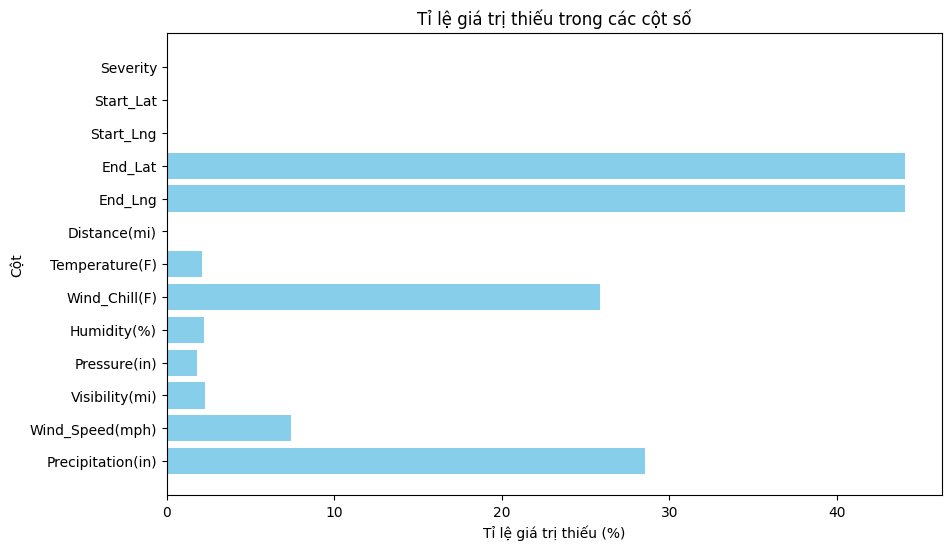

In [16]:
# Lặp qua các cột số để tính tỉ lệ giá trị thiếu
missing_percentages = [(col, df[col].isnull().mean() * 100) for col in numerical_cols]

# Tạo một list các tên cột và tỉ lệ giá trị thiếu tương ứng
columns = [x[0] for x in missing_percentages]
percentages = [x[1] for x in missing_percentages]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(columns, percentages, color='skyblue')
plt.xlabel('Tỉ lệ giá trị thiếu (%)')
plt.ylabel('Cột')
plt.title('Tỉ lệ giá trị thiếu trong các cột số')
plt.gca().invert_yaxis()  # Đảo ngược thứ tự cột để cột có tỉ lệ lớn nhất ở trên cùng
plt.show()

- Chúng ta có thể thấy, 2 cột `End_lat` và `End_Lng` là 2 cột tọa độ có tỉ lệ missing cao. Chúng ta có thể drop hoặc điền bằng 0.
- Những cột còn lại có thể điền missing value bằng **mean**

In [17]:

coordinate_col = {
    'End_Lat': 0,  # Fill missing values in End_Lat with 0
    'End_Lng': 0,  #
}
df.fillna(value= coordinate_col , inplace=True)
# điền cho những cột còn lại
columns_to_fill_mean = [col for col in numerical_cols if col not in coordinate_col.keys()]
df[columns_to_fill_mean] = df[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))

print(df[numerical_cols].isnull().sum())


Severity             0
Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance(mi)         0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
dtype: int64


### 2.5.2 Xử lí Outlier

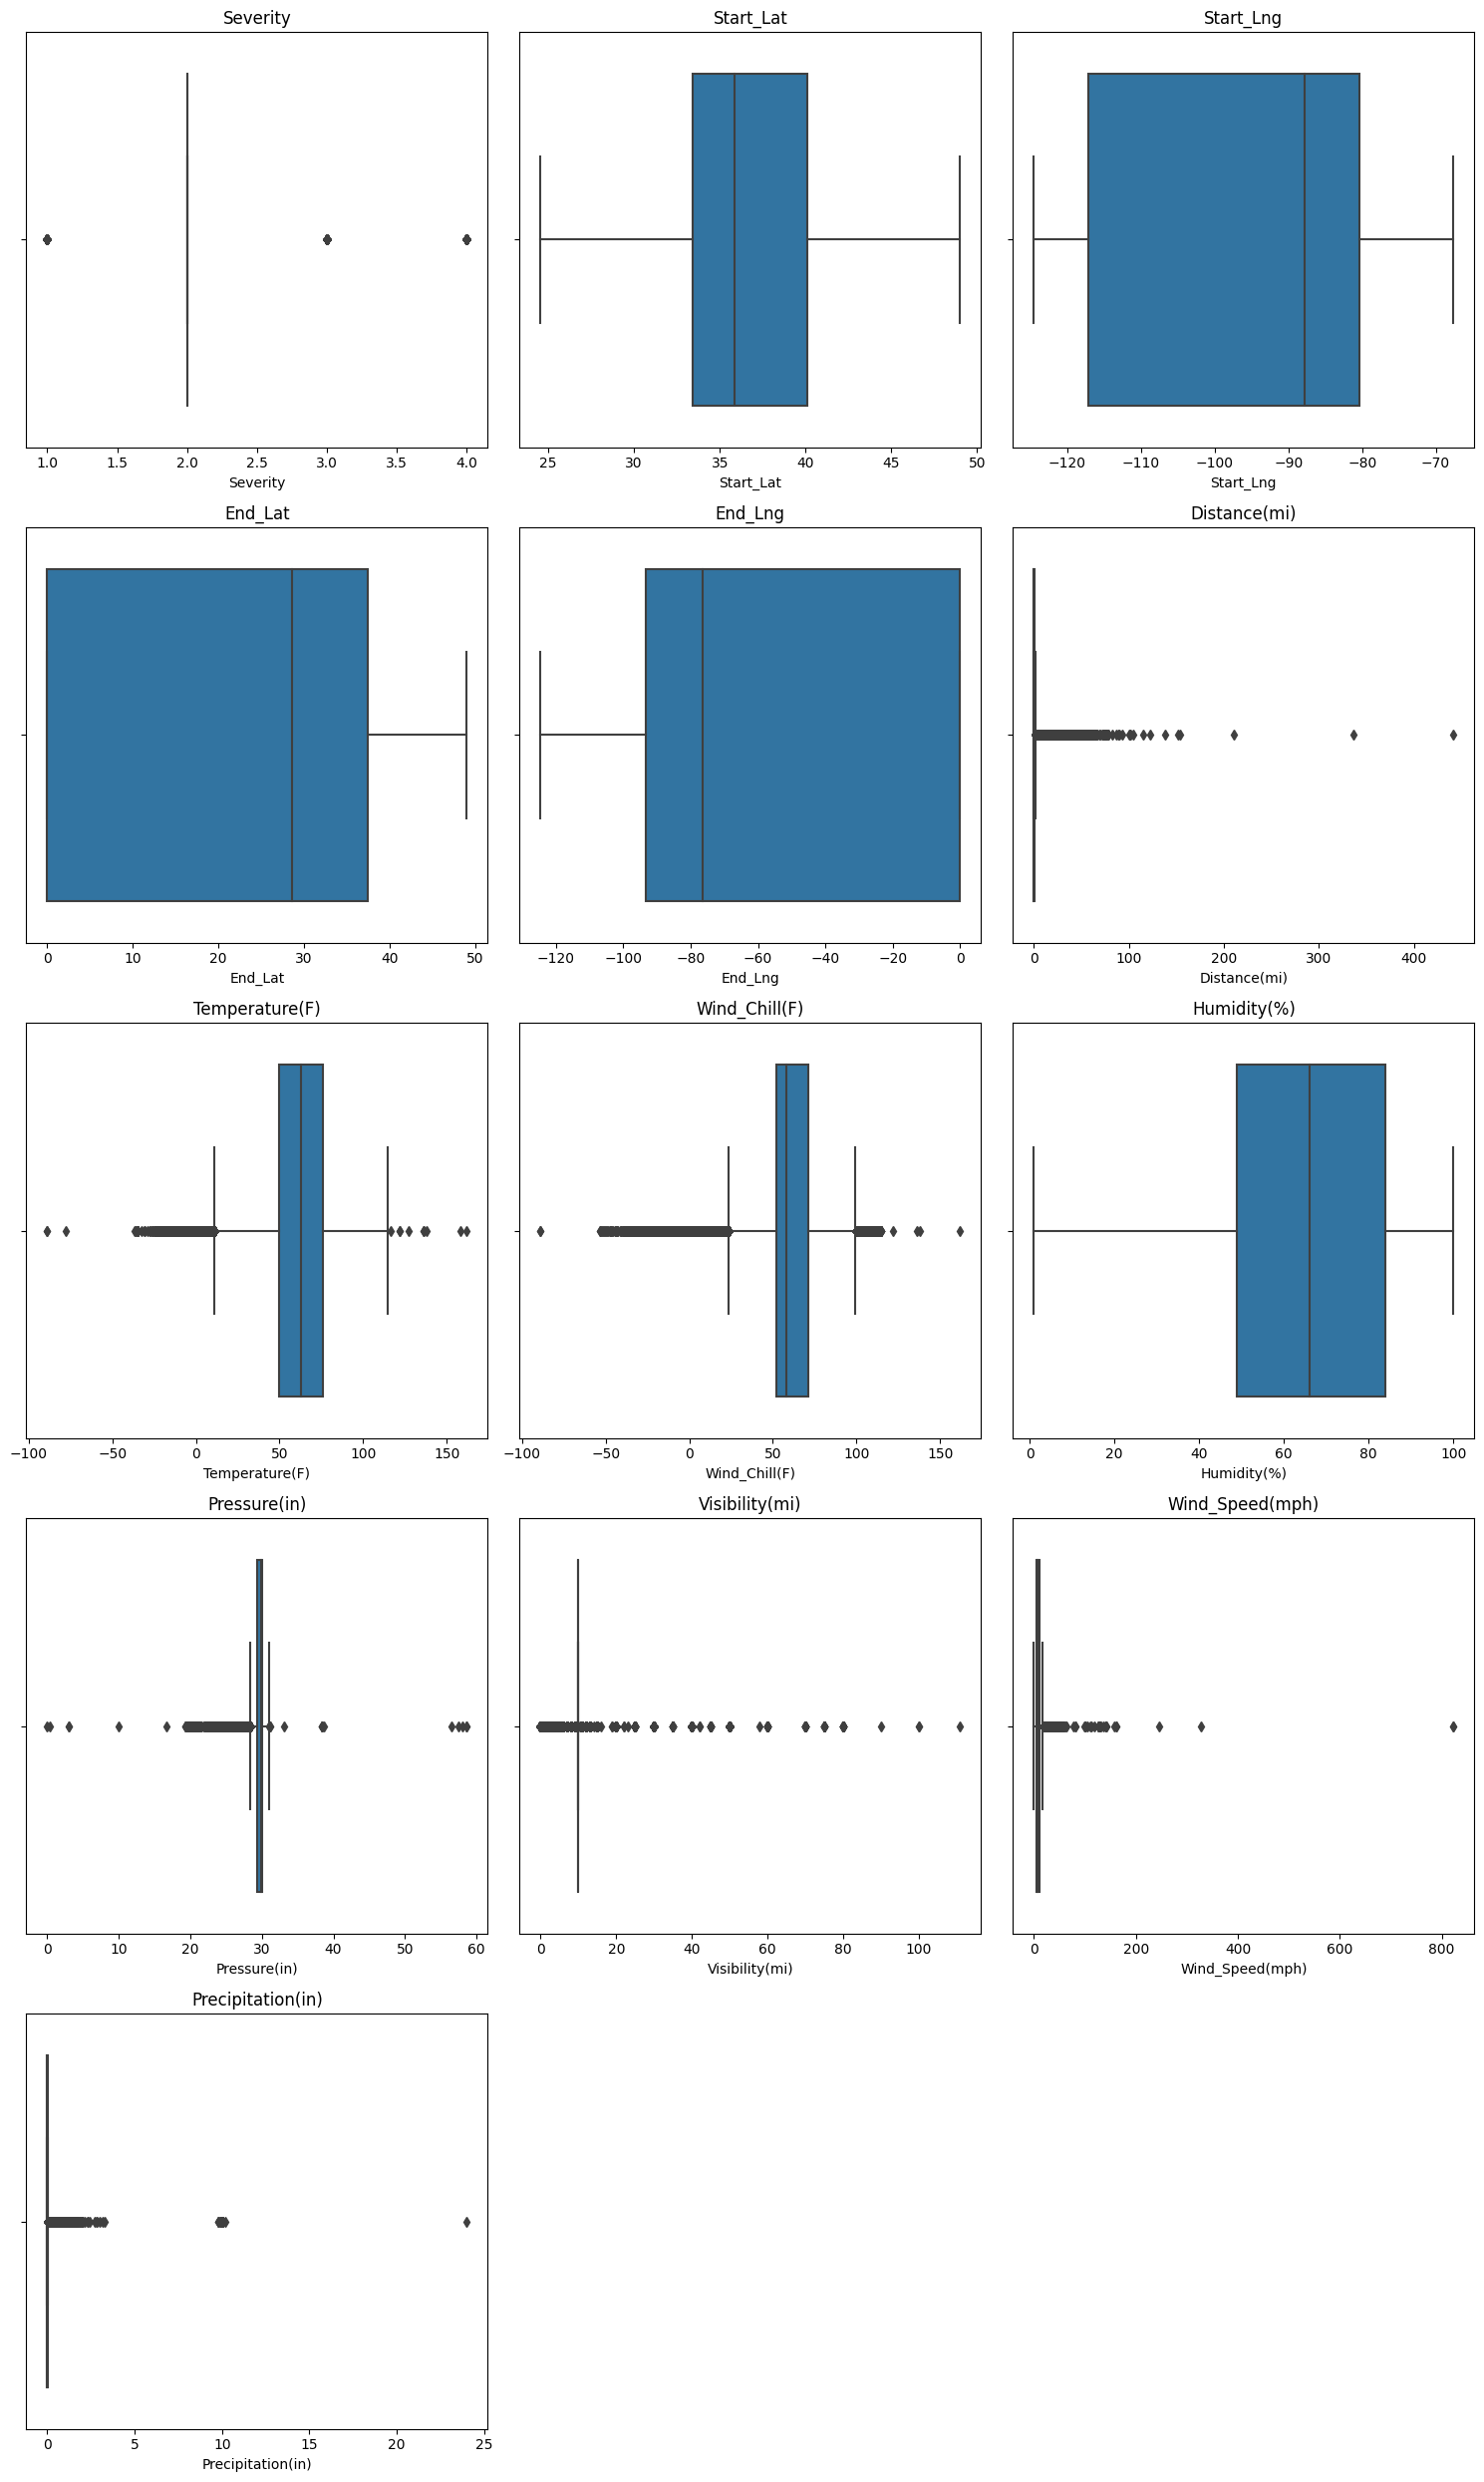

In [18]:
num_cols = 3
num_rows = (len(numerical_cols) - 1) // num_cols + 1

# Tạo figure và axes cho boxplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Lặp qua các cột số để vẽ boxplot
for i, col in enumerate(numerical_cols):
    row = i // num_cols
    col_name = col  # Lưu tên cột
    col = i % num_cols
    sns.boxplot(x=df[col_name], ax=axes[row, col]) 
    axes[row, col].set_title(col_name)  

# Xóa các axes dư thừa nếu có
for i in range(len(numerical_cols), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

- Cột `Severity` thể hiện mức độ nghiêm trọng, có giá trị từ 1 - 4 nên chúng ta không cần xử lí outlier. 
- Các cột còn lại xử lí outlier bằng IQR.

In [19]:

col_with_outliers = [col for col in numerical_cols if col != 'Severity']

def handle_outlier(col_to_handle: list, df):
    for col in col_to_handle:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        

        IQR = Q3 - Q1
        
        # tính khoảng 1.5 IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with values based on IQR
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return df


df = handle_outlier(col_with_outliers, df)






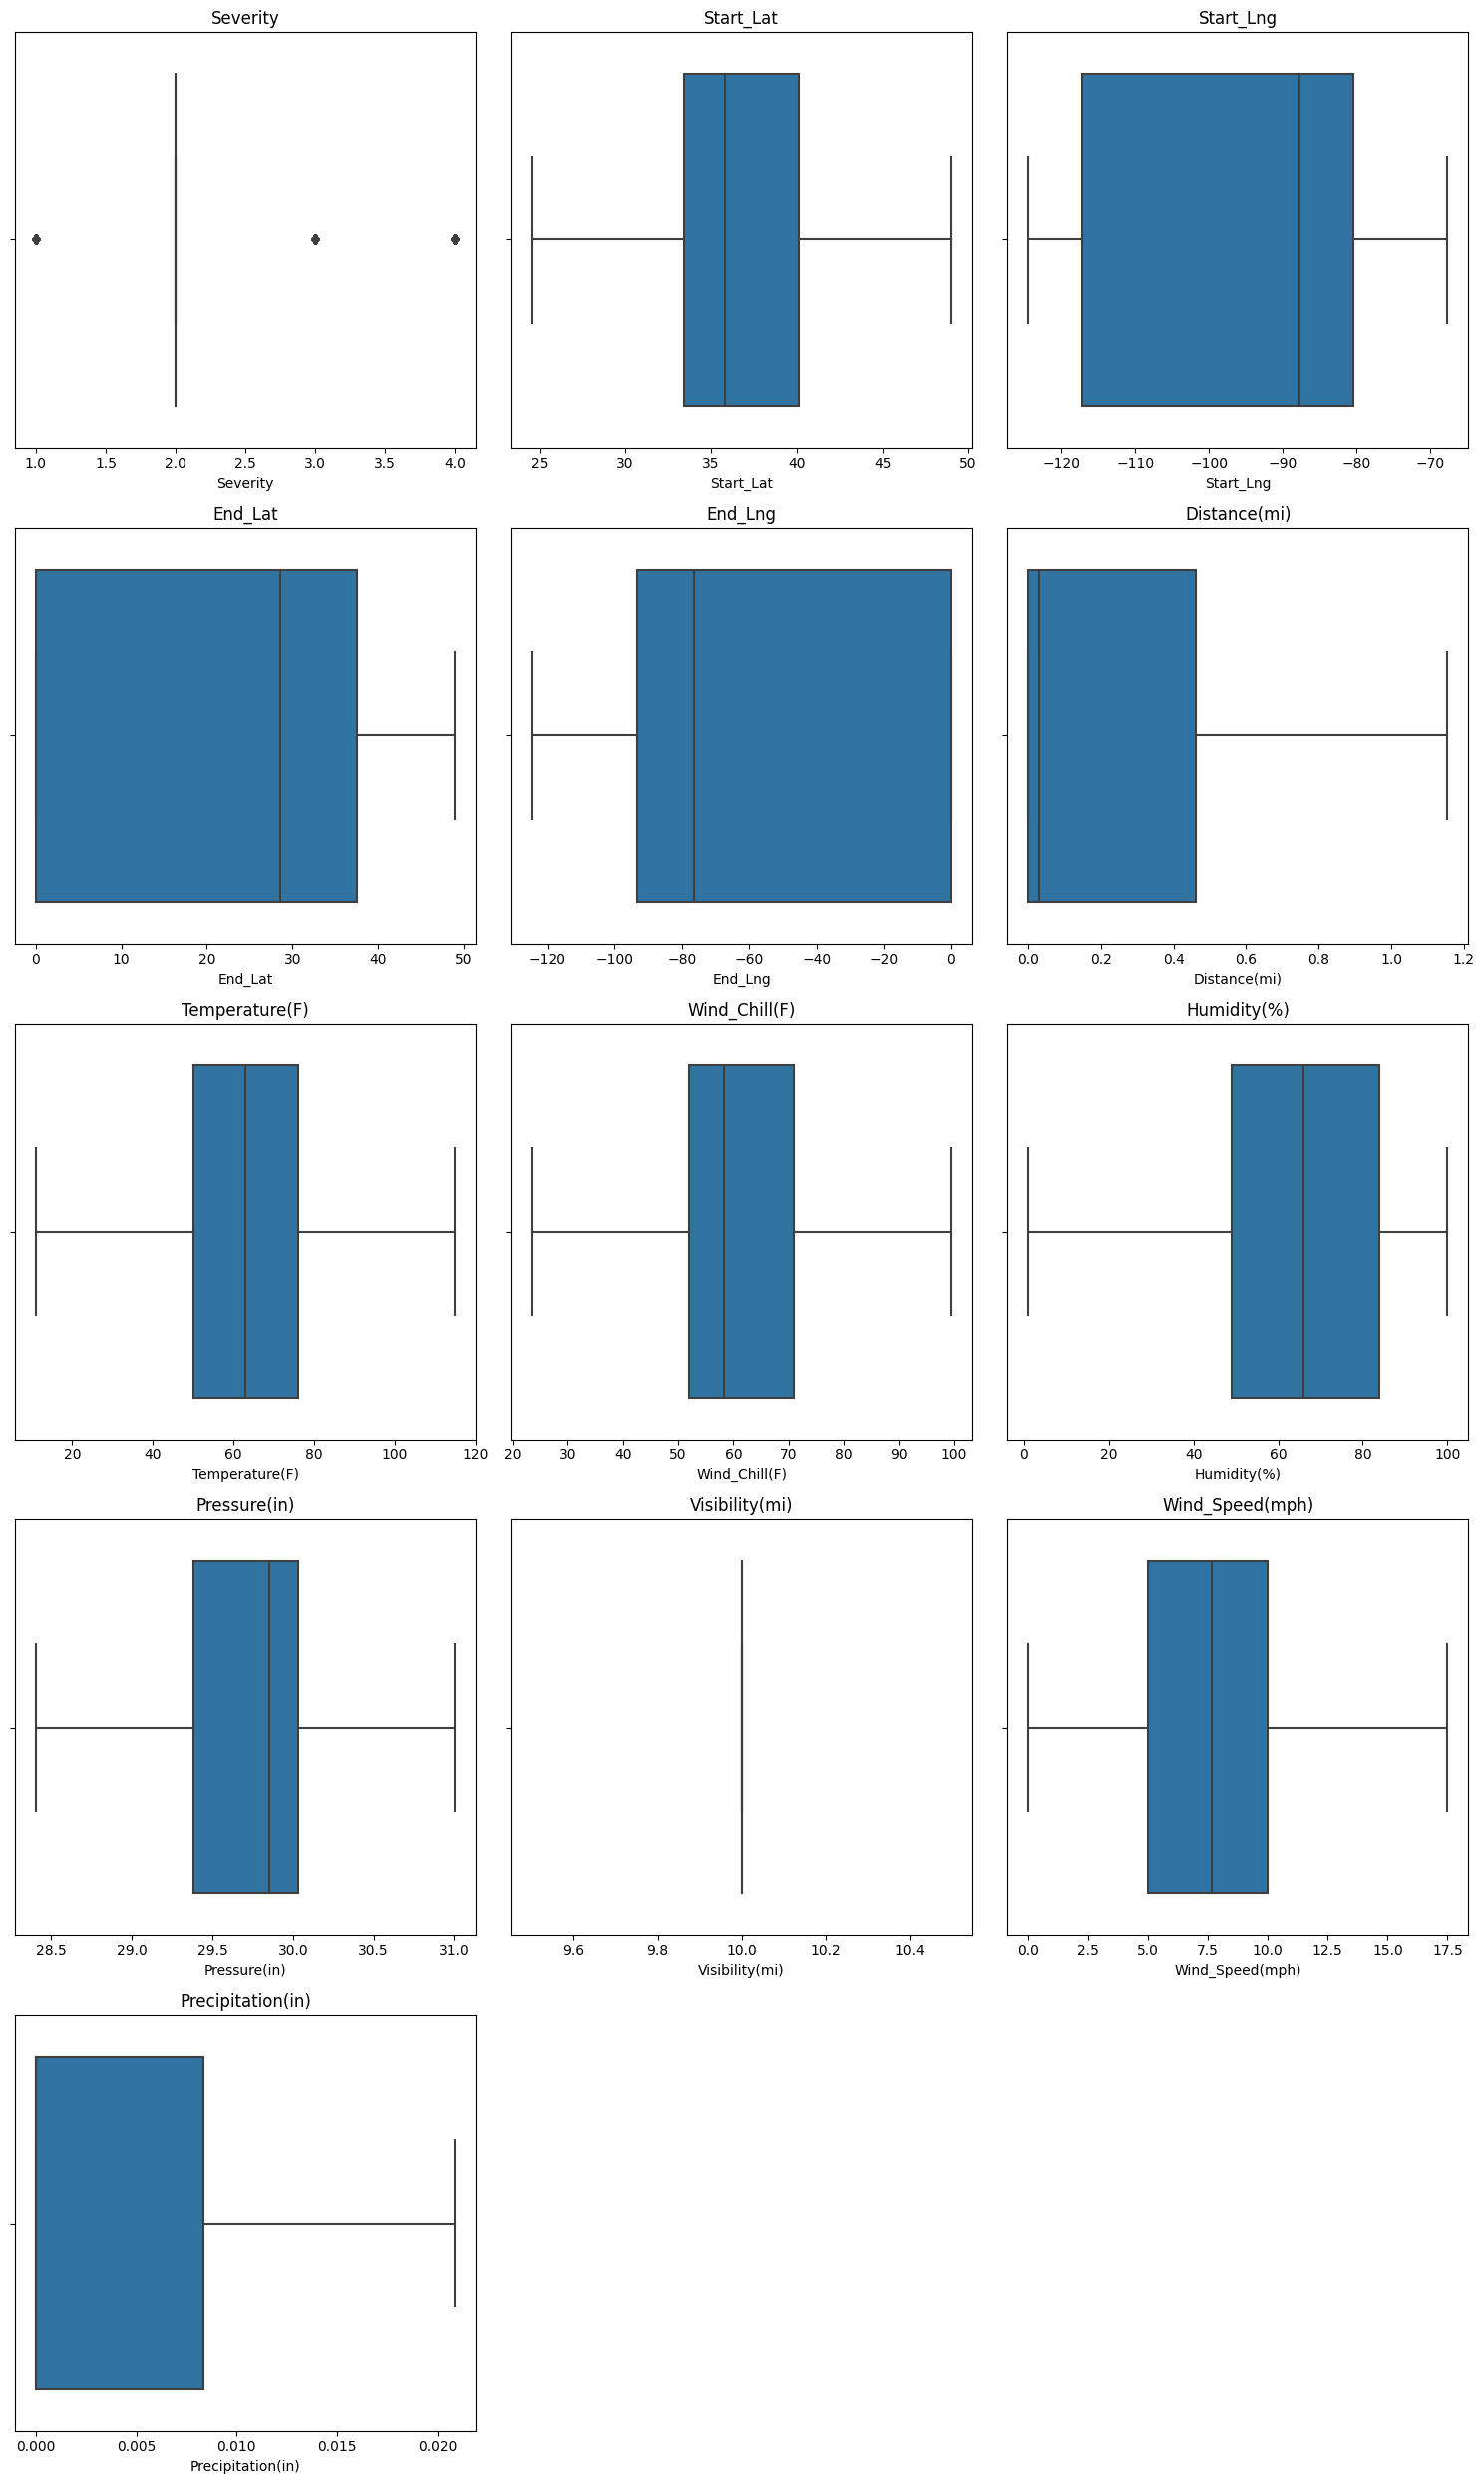

In [20]:
num_cols = 3
num_rows = (len(numerical_cols) - 1) // num_cols + 1

# Tạo figure và axes cho boxplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Lặp qua các cột số để vẽ boxplot
for i, col in enumerate(numerical_cols):
    row = i // num_cols
    col_name = col  # Lưu tên cột
    col = i % num_cols
    sns.boxplot(x=df[col_name], ax=axes[row, col]) 
    axes[row, col].set_title(col_name)  

# Xóa các axes dư thừa nếu có
for i in range(len(numerical_cols), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

NOTE: có thể còn chỉnh sửa, vì không biết có nên xử lí cho mấy cái tọa độ hay không